In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.2)


In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
print(sklearn.__version__)

0.20.2


In [4]:
print(np.__version__)

1.16.1


In [5]:
print(pd.__version__)

0.23.4


In [6]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  \
132  25.0          4         140.0         75    2542          17.0   
172  25.0          4          90.0         71    2223          16.5   
318  29.8          4         134.0         90    2711          15.5   
339  26.6          4         151.0         84    2635          16.4   
104  12.0          8         400.0        167    4906          12.5   

     model year  origin                car name  
132          74       1          chevrolet vega  
172          75       2       volkswagen dasher  
318          80       3  toyota corona liftback  
339          81       1           buick skylark  
104          73       1            ford country

In [7]:
automobile_df.shape

(398, 9)

In [8]:
automobile_df = automobile_df.replace('?', np.nan)

In [9]:
automobile_df = automobile_df.dropna()

In [10]:
automobile_df.shape

(392, 9)

#### Drop columns which don't make sense as features

In [11]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [12]:
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  \
258  20.6          6         231.0        105    3380          15.8   
332  29.8          4          89.0         62    1845          15.3   
308  33.5          4         151.0         90    2556          13.2   
339  26.6          4         151.0         84    2635          16.4   
343  39.1          4          79.0         58    1755          16.9   

     model year  
258          78  
332          80  
308          79  
339          81  
343          81

#### Convert to a complete year format

In [13]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [14]:
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration model year
274  20.3          5         131.0        103    2830          15.9       1978
260  18.6          6         225.0        110    3620          18.7       1978
232  16.0          8         351.0        149    4335          14.5       1977
91   13.0          8         400.0        150    4464          12.0       1973
18   27.0          4          97.0         88    2130          14.5       1970

#### Add an age column

In [15]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [16]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [17]:
automobile_df.sample(5)

mpg  cylinders  displacement horsepower  weight  acceleration  age
75   14.0          8         318.0        150    4077          14.0   47
378  38.0          4         105.0         63    2125          14.7   37
101  23.0          6         198.0         95    2904          16.0   46
140  14.0          8         304.0        150    4257          15.5   45
77   22.0          4         121.0         76    2511          18.0   47

In [18]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [19]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [20]:
automobile_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration         age  
count    392.000000  392.000000  
mean      15.541327   43.020408  
std        2.758864    3.683737  
min        8.000000   37.000000  
25%       13.775000   40.000000  
50%       15.500000   43.000000  
75%       17.025000   46.000000  
max       24.800000   49.000000

### Visualizing relationships

Text(0, 0.5, 'Miles per gallon')

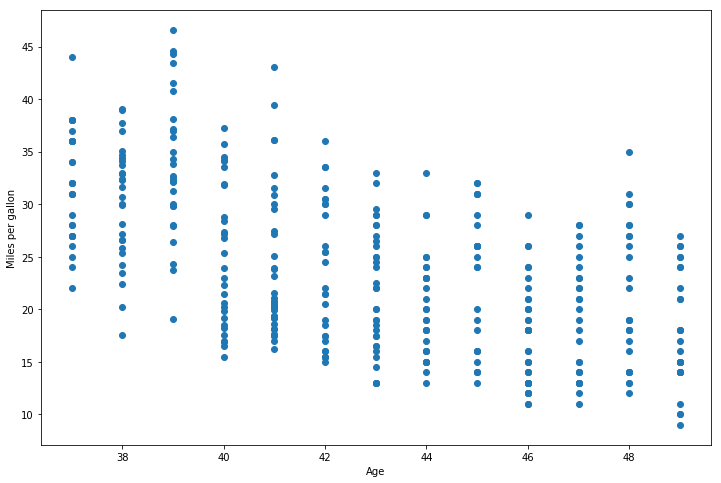

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

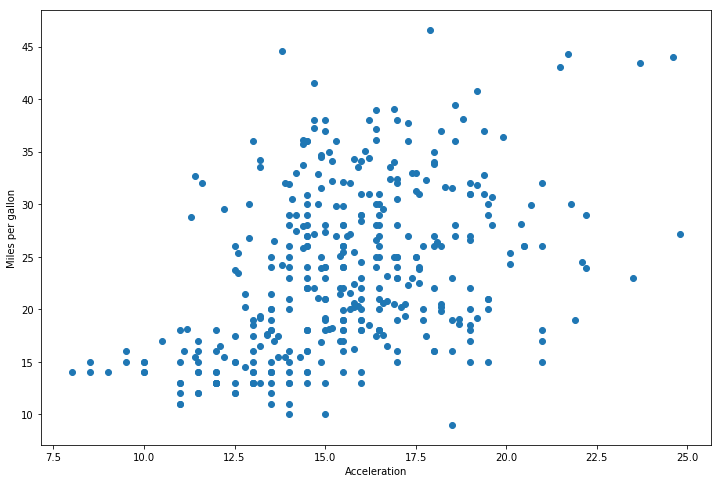

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

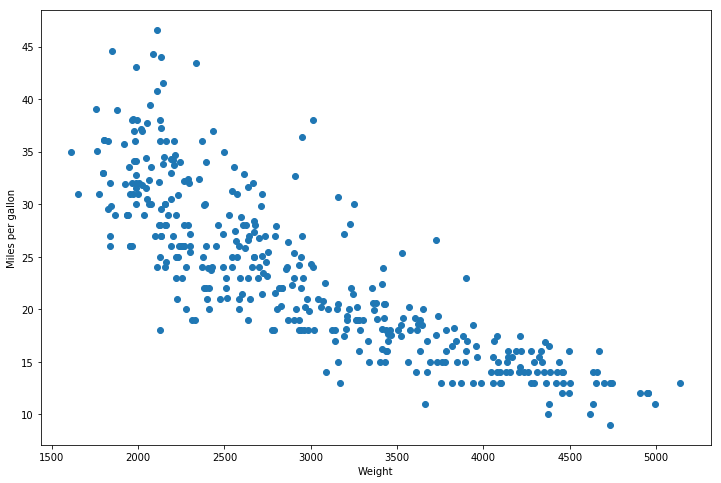

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

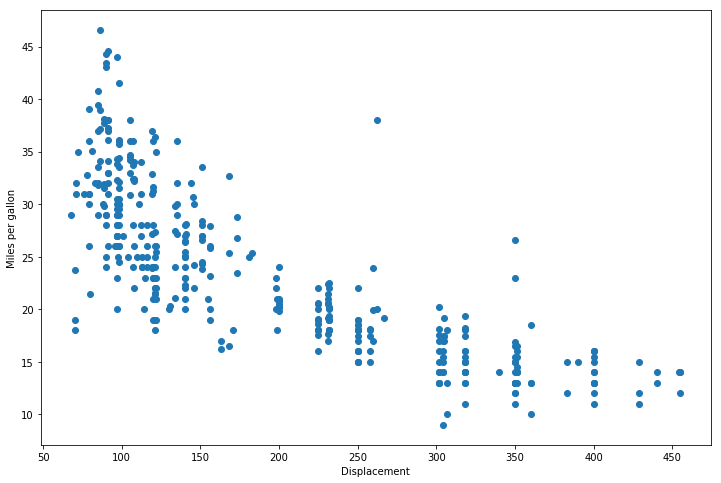

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

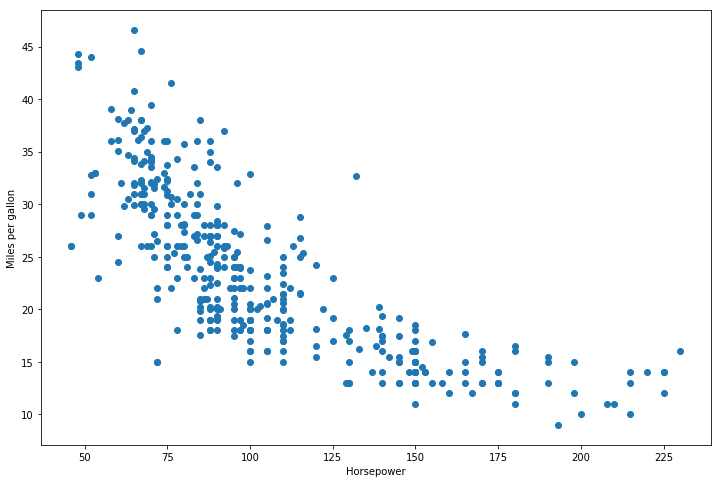

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

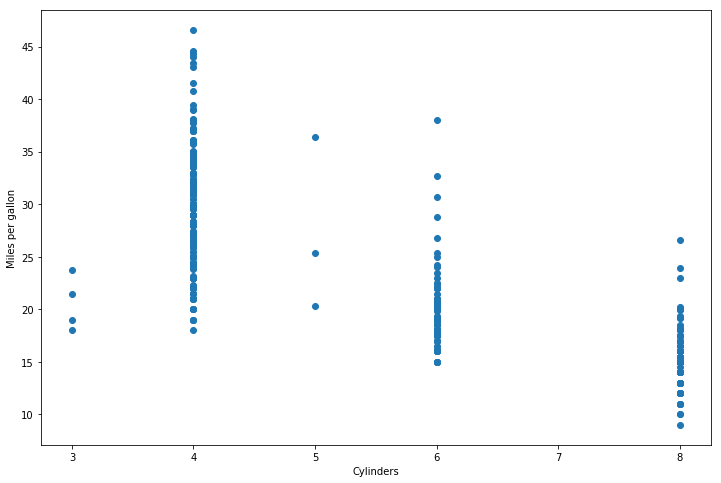

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [27]:
automobile_corr = automobile_df.corr()

automobile_corr

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
age          -0.580541   0.345647      0.369855    0.416361  0.309120   

              acceleration       age  
mpg               0.423329 -0.580541  
cylinders        -0.504683  0.345647  
displacement     -0.543800  0.369855  
horsepower       -0.689196  0.416361  
weight           -0.416839  0.309120  
acceleration      1.000000 -0.290316  
age              -0.290316  1.000000

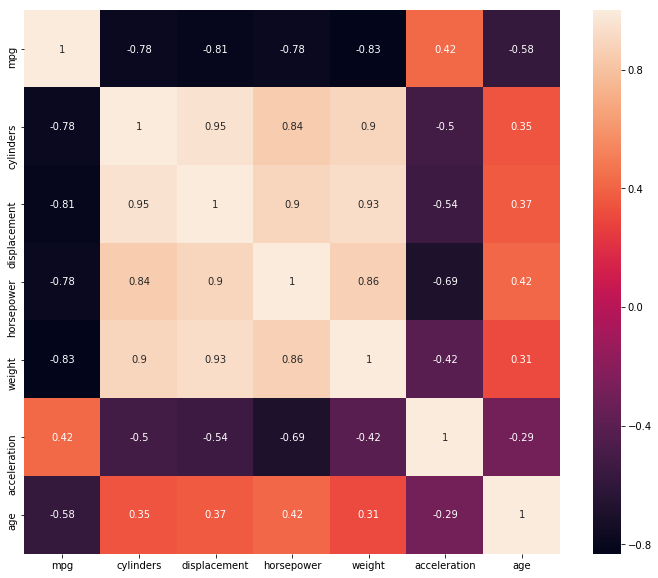

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True)

In [29]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  age
0  36.0          4         120.0          88    2160          14.5   37
1  26.0          4         108.0          93    2391          15.5   45
2  32.4          4         107.0          72    2290          17.0   39
3  13.0          8         350.0         175    4100          13.0   46
4  30.0          4         146.0          67    3250          21.8   39

In [30]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

In [31]:
!ls datasets

auto-mpg-processed.csv auto-mpg.csv           exams.csv
